# Association Rule Mining: Transactions in a Grocery Store

## 🛒 Introduction

This notebook reproduces the examples from Section 5.5: "Transactions in a Grocery Store" using the arules and arulesViz libraries in R. The goal is to perform association rule mining on real-world market basket data.

## 📦 Load (and/or Install) Packages

In [1]:
# # Install required packages if not already installed
# pkg <- c("arules", "arulesViz")
# new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
# if (length(new.pkg)) {
#   install.packages(new.pkg, dependencies = TRUE)
# }

# # Load the packages
# sapply(pkg, require, character.only = TRUE)

In [2]:
sapply(c("arules", "arulesViz"), require, character.only = TRUE)

Loading required package: arules



Loading required package: Matrix




Attaching package: ‘arules’




The following objects are masked from ‘package:base’:

    abbreviate, write




Loading required package: arulesViz



arules arulesViz 
     TRUE      TRUE

## 📊 Explore the Groceries Dataset


In [3]:
data(Groceries)

In [4]:
Groceries

transactions in sparse format with
 9835 transactions (rows) and
 169 items (columns)

In [5]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [6]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

The transactions class contains three slots:

* transactionInfo: A data frame with vectors of the same length as the number of transactions.
* itemInfo: A data frame to store item labels.
* data: A binary incidence matrix that indicates which item labels appear in every transaction.

In [7]:
Groceries@itemInfo[1:10, ]

,labels,level2,level1
,<chr>,<fct>,<fct>
1,frankfurter,sausage,meat and sausage
2,sausage,sausage,meat and sausage
3,liver loaf,sausage,meat and sausage
4,ham,sausage,meat and sausage
5,meat,sausage,meat and sausage
6,finished products,sausage,meat and sausage
7,organic sausage,sausage,meat and sausage
8,chicken,poultry,meat and sausage
9,turkey,poultry,meat and sausage


In [8]:
apply(Groceries@data[, 10:20], 2,
     function(r) paste(Groceries@itemInfo[r, "labels"], collapse= ", "))

[1] "whole milk, cereals"                                                                         
 [2] "tropical fruit, other vegetables, white bread, bottled water, chocolate"                     
 [3] "citrus fruit, tropical fruit, whole milk, butter, curd, yogurt, flour, bottled water, dishes"
 [4] "beef"                                                                                        
 [5] "frankfurter, rolls/buns, soda"                                                               
 [6] "chicken, tropical fruit"                                                                     
 [7] "butter, sugar, fruit/vegetable juice, newspapers"                                            
 [8] "fruit/vegetable juice"                                                                       
 [9] "packaged fruit/vegetables"                                                                   
[10] "chocolate"                                                                                   
[11] "specialty bar"

## 🔍 Frequent Itemset Generation

Assuming the minimum support treshold to be 0.02, because the dataset contians 9853 transactions, an itemset should appear at least 197 times to be considered a frequent itemset. 

Also note that by default the apriori() fucntion executes all teh iterations at once, however, we set the parameters manually to simulate each iteration of the algorithm.

In [9]:
itemsets <- apriori(Groceries, parameter=list(minlen=1, maxlen=1, support=0.02, target="frequent itemsets"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target  ext
      1 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1

Warning message in apriori(Groceries, parameter = list(minlen = 1, maxlen = 1, support = 0.02, :
“Mining stopped (maxlen reached). Only patterns up to a length of 1 returned!”


 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [59 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [10]:
summary(itemsets)

set of 59 itemsets

most frequent items:
frankfurter     sausage         ham        meat     chicken     (Other) 
          1           1           1           1           1          54 

element (itemset/transaction) length distribution:sizes
 1 
59 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

summary of quality measures:
    support            count       
 Min.   :0.02105   Min.   : 207.0  
 1st Qu.:0.03015   1st Qu.: 296.5  
 Median :0.04809   Median : 473.0  
 Mean   :0.06200   Mean   : 609.8  
 3rd Qu.:0.07666   3rd Qu.: 754.0  
 Max.   :0.25552   Max.   :2513.0  

includes transaction ID lists: FALSE 

mining info:
      data ntransactions support confidence
 Groceries          9835    0.02          1
                                                                                                              call
 apriori(data = Groceries, parameter = list(minlen = 1, maxlen = 1, support = 0.02, target = "frequent itemsets

In [11]:
inspect(head(sort(itemsets, by = "support"), 10))

     items              support    count
[1]  {whole milk}       0.25551601 2513 
[2]  {other vegetables} 0.19349263 1903 
[3]  {rolls/buns}       0.18393493 1809 
[4]  {soda}             0.17437722 1715 
[5]  {yogurt}           0.13950178 1372 
[6]  {bottled water}    0.11052364 1087 
[7]  {root vegetables}  0.10899847 1072 
[8]  {tropical fruit}   0.10493137 1032 
[9]  {shopping bags}    0.09852567  969 
[10] {sausage}          0.09395018  924 


In [12]:
itemsets <- apriori(Groceries, parameter=list(minlen=2, maxlen=2, support=0.02, target="frequent itemsets"))
summary(itemsets)
inspect(head(sort(itemsets, by = "support"), 10))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      2
 maxlen            target  ext
      2 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 196 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [59 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2

Warning message in apriori(Groceries, parameter = list(minlen = 2, maxlen = 2, support = 0.02, :
“Mining stopped (maxlen reached). Only patterns up to a length of 2 returned!”


 done [0.01s].
sorting transactions ... done [0.00s].
writing ... [61 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 61 itemsets

most frequent items:
      whole milk other vegetables           yogurt       rolls/buns 
              25               17                9                9 
            soda          (Other) 
               9               53 

element (itemset/transaction) length distribution:sizes
 2 
61 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support            count      
 Min.   :0.02003   Min.   :197.0  
 1st Qu.:0.02227   1st Qu.:219.0  
 Median :0.02613   Median :257.0  
 Mean   :0.02951   Mean   :290.3  
 3rd Qu.:0.03223   3rd Qu.:317.0  
 Max.   :0.07483   Max.   :736.0  

includes transaction ID lists: FALSE 

mining info:
      data ntransactions support confidence
 Groceries          9835    0.02          1
                                                                                                              call
 apriori(data = Groceries, parameter = list(minlen = 2, 

     items                               support    count
[1]  {other vegetables, whole milk}      0.07483477 736  
[2]  {whole milk, rolls/buns}            0.05663447 557  
[3]  {whole milk, yogurt}                0.05602440 551  
[4]  {root vegetables, whole milk}       0.04890696 481  
[5]  {root vegetables, other vegetables} 0.04738180 466  
[6]  {other vegetables, yogurt}          0.04341637 427  
[7]  {other vegetables, rolls/buns}      0.04260295 419  
[8]  {tropical fruit, whole milk}        0.04229792 416  
[9]  {whole milk, soda}                  0.04006101 394  
[10] {rolls/buns, soda}                  0.03833249 377  


We can continue this similution like this by increasing the maxLen of iteration.

## 📏 Rule Generation and Visualization

In [13]:
# Generate rules with minimum support and confidence
rules <- apriori(Groceries, parameter=list(support=0.001, confidence=0.6, target = "rules"))
summary(rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 9 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [157 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [2918 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 2918 rules

rule length distribution (lhs + rhs):sizes
   2    3    4    5    6 
   3  490 1765  626   34 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.000   4.000   4.068   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001017   Min.   :0.6000   Min.   :0.001017   Min.   : 2.348  
 1st Qu.:0.001118   1st Qu.:0.6316   1st Qu.:0.001525   1st Qu.: 2.668  
 Median :0.001220   Median :0.6818   Median :0.001830   Median : 3.168  
 Mean   :0.001480   Mean   :0.7028   Mean   :0.002157   Mean   : 3.450  
 3rd Qu.:0.001525   3rd Qu.:0.7500   3rd Qu.:0.002339   3rd Qu.: 3.692  
 Max.   :0.009354   Max.   :1.0000   Max.   :0.014642   Max.   :18.996  
     count      
 Min.   :10.00  
 1st Qu.:11.00  
 Median :12.00  
 Mean   :14.55  
 3rd Qu.:15.00  
 Max.   :92.00  

mining info:
      data ntransactions support confidence
 Groceries          9835   0.001        0.6
                         

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



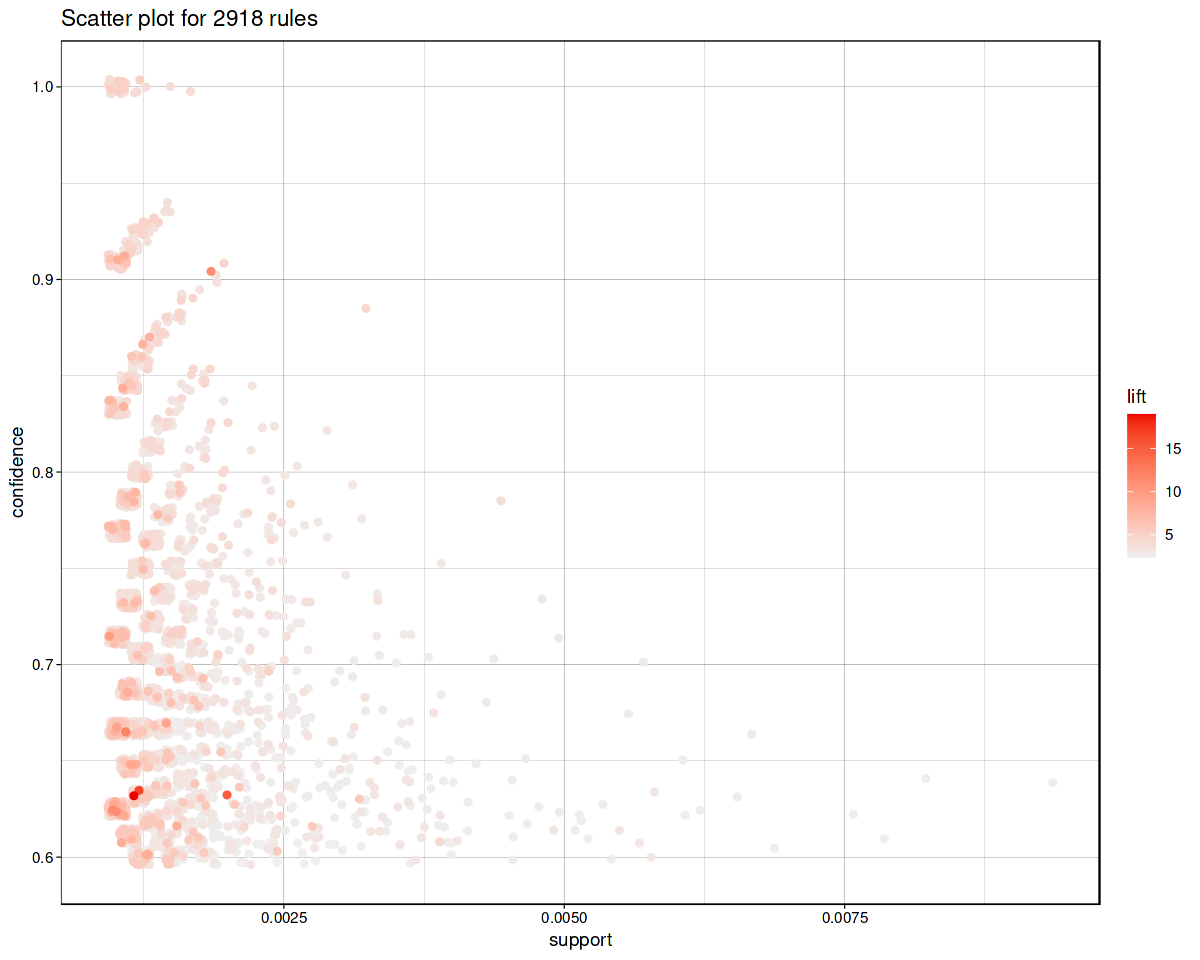

In [14]:
options(repr.plot.width = 10, repr.plot.height = 8)
plot(rules)

### Association Rule: X → Y


$$
\text{Support}(X) = \frac{\text{Transactions containing } X}{\text{Total number of transactions}}
$$

$$
\text{Confidence}(X \rightarrow Y) = \frac{\text{Support}(X \cap Y)}{\text{Support}(X)} = P(Y|X)
$$

$$
\text{Lift}(X \rightarrow Y) = \frac{\text{Confidence}(X \rightarrow Y)}{\text{Support}(Y)} = \frac{P(Y|X)}{P(Y)}
$$

$$
\text{Leverage}(X \rightarrow Y) = \text{Support}(X \cap Y) - (\text{Support}(X) \times \text{Support}(Y))
$$


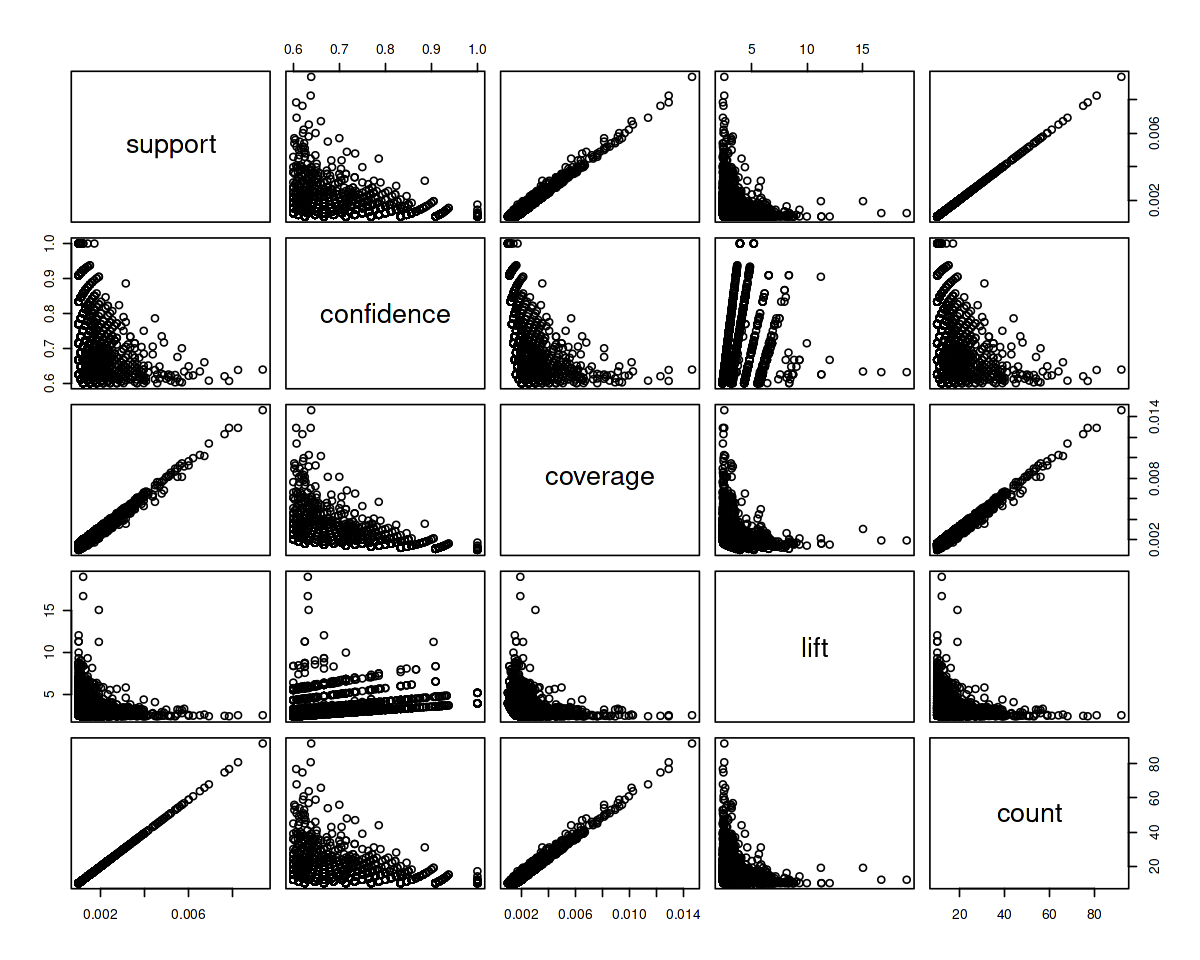

In [15]:
plot(rules@quality)

In [16]:
# Top rules by lift
inspect(head(sort(rules, by = "lift"), 10))

     lhs                         rhs                      support confidence    coverage      lift count
[1]  {Instant food products,                                                                            
      soda}                   => {hamburger meat}     0.001220132  0.6315789 0.001931876 18.995654    12
[2]  {soda,                                                                                             
      popcorn}                => {salty snack}        0.001220132  0.6315789 0.001931876 16.697793    12
[3]  {ham,                                                                                              
      processed cheese}       => {white bread}        0.001931876  0.6333333 0.003050330 15.045491    19
[4]  {tropical fruit,                                                                                   
      other vegetables,                                                                                 
      yogurt,                                          

In [17]:
# Select ruels with high confidence
confidentRules <- rules[quality(rules)$confidence > 0.9]

confidentRules

set of 127 rules 

Itemsets in Antecedent (LHS)
  [1] "{liquor,red/blush wine}"                                             
  [2] "{citrus fruit,other vegetables,soda,fruit/vegetable juice}"          
  [3] "{tropical fruit,other vegetables,whole milk,yogurt,oil}"             
  [4] "{tropical fruit,whole milk,butter,sliced cheese}"                    
  [5] "{other vegetables,curd,whipped/sour cream,cream cheese }"            
  [6] "{tropical fruit,other vegetables,butter,white bread}"                
  [7] "{citrus fruit,root vegetables,soft cheese}"                          
  [8] "{pip fruit,whipped/sour cream,brown bread}"                          
  [9] "{tropical fruit,grapes,whole milk,yogurt}"                           
 [10] "{ham,tropical fruit,pip fruit,yogurt}"                               
 [11] "{ham,tropical fruit,pip fruit,whole milk}"                           
 [12] "{tropical fruit,butter,whipped/sour cream,fruit/vegetable juice}"    
 [13] "{whole milk,rolls/buns,soda,newspapers}"

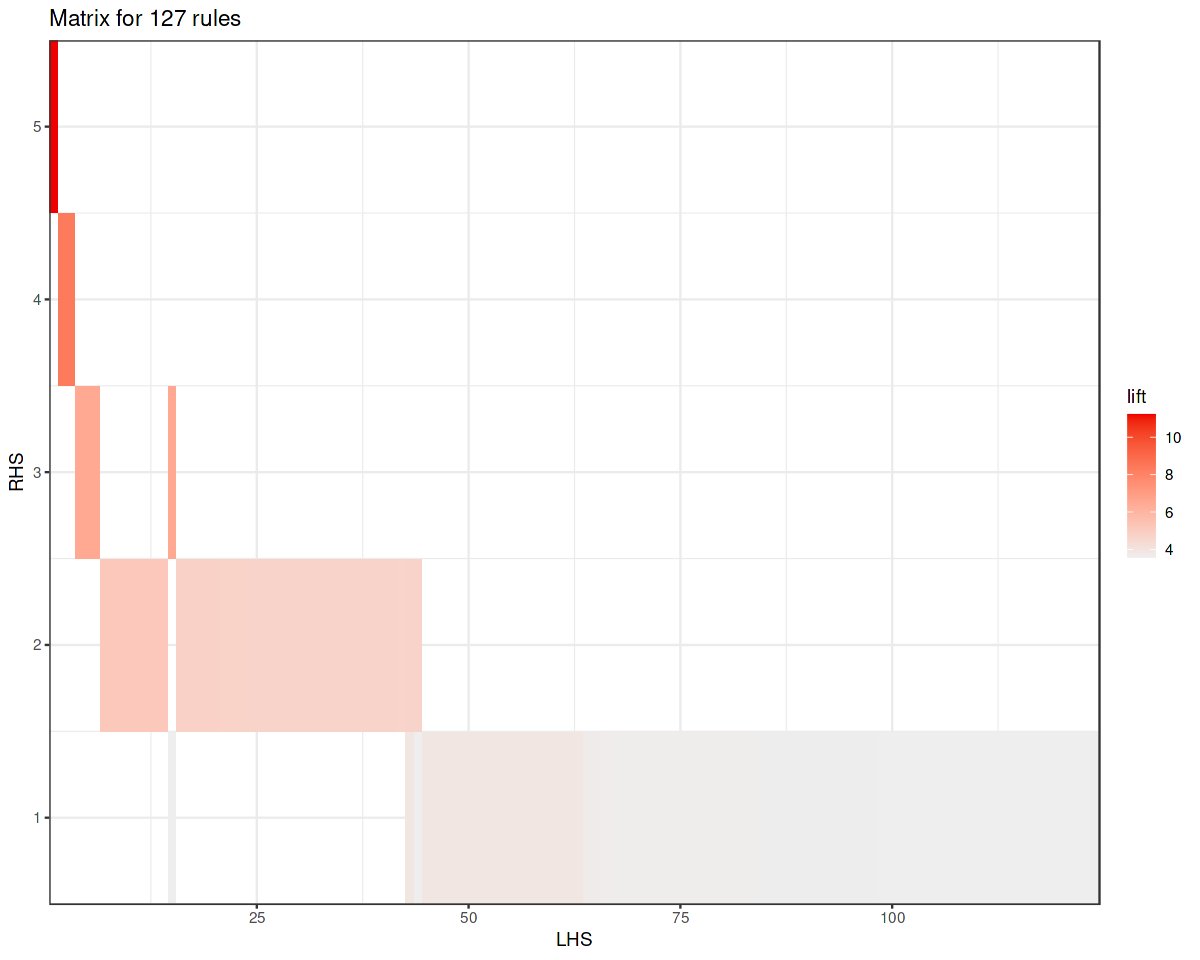

In [18]:
# Matrix plot of confident rules
options(repr.plot.width = 10, repr.plot.height = 8)
plot(confidentRules, method = "matrix", measure = c("lift", "confidence"))

The following code provides a visualization of the top five rules with the highest lift. In the graph the arrow always points form an item on the LHS to an item on the RHS.

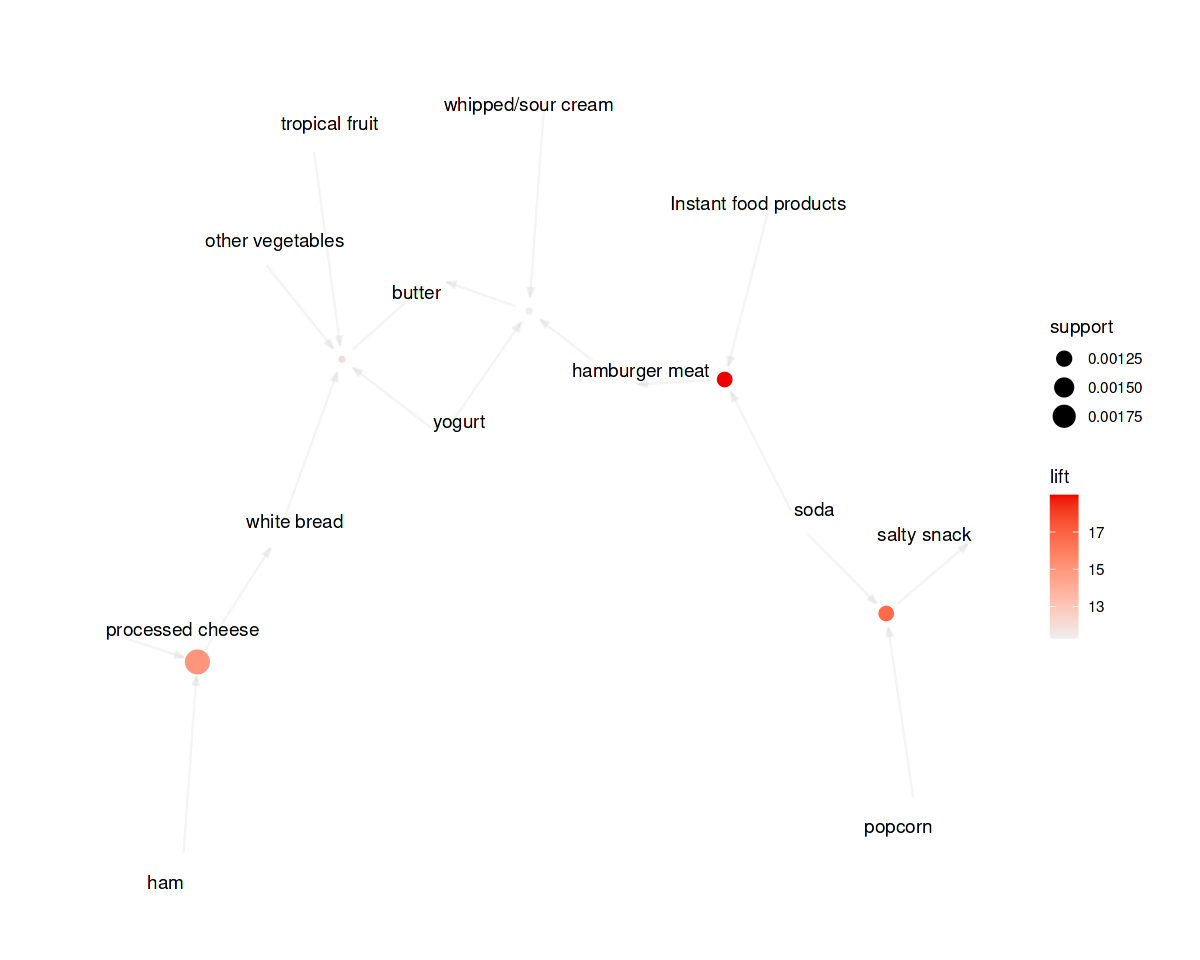

In [19]:
highLiftRules <- head(sort(rules, by = "lift"), 5)
plot(highLiftRules, method = "graph")

You can see that the arrows are not completely visible, check [this stackoverflow's post](https://stackoverflow.com/questions/79612808/how-can-i-increase-arrow-and-edge-thickness-in-plot-with-method-graph-from).

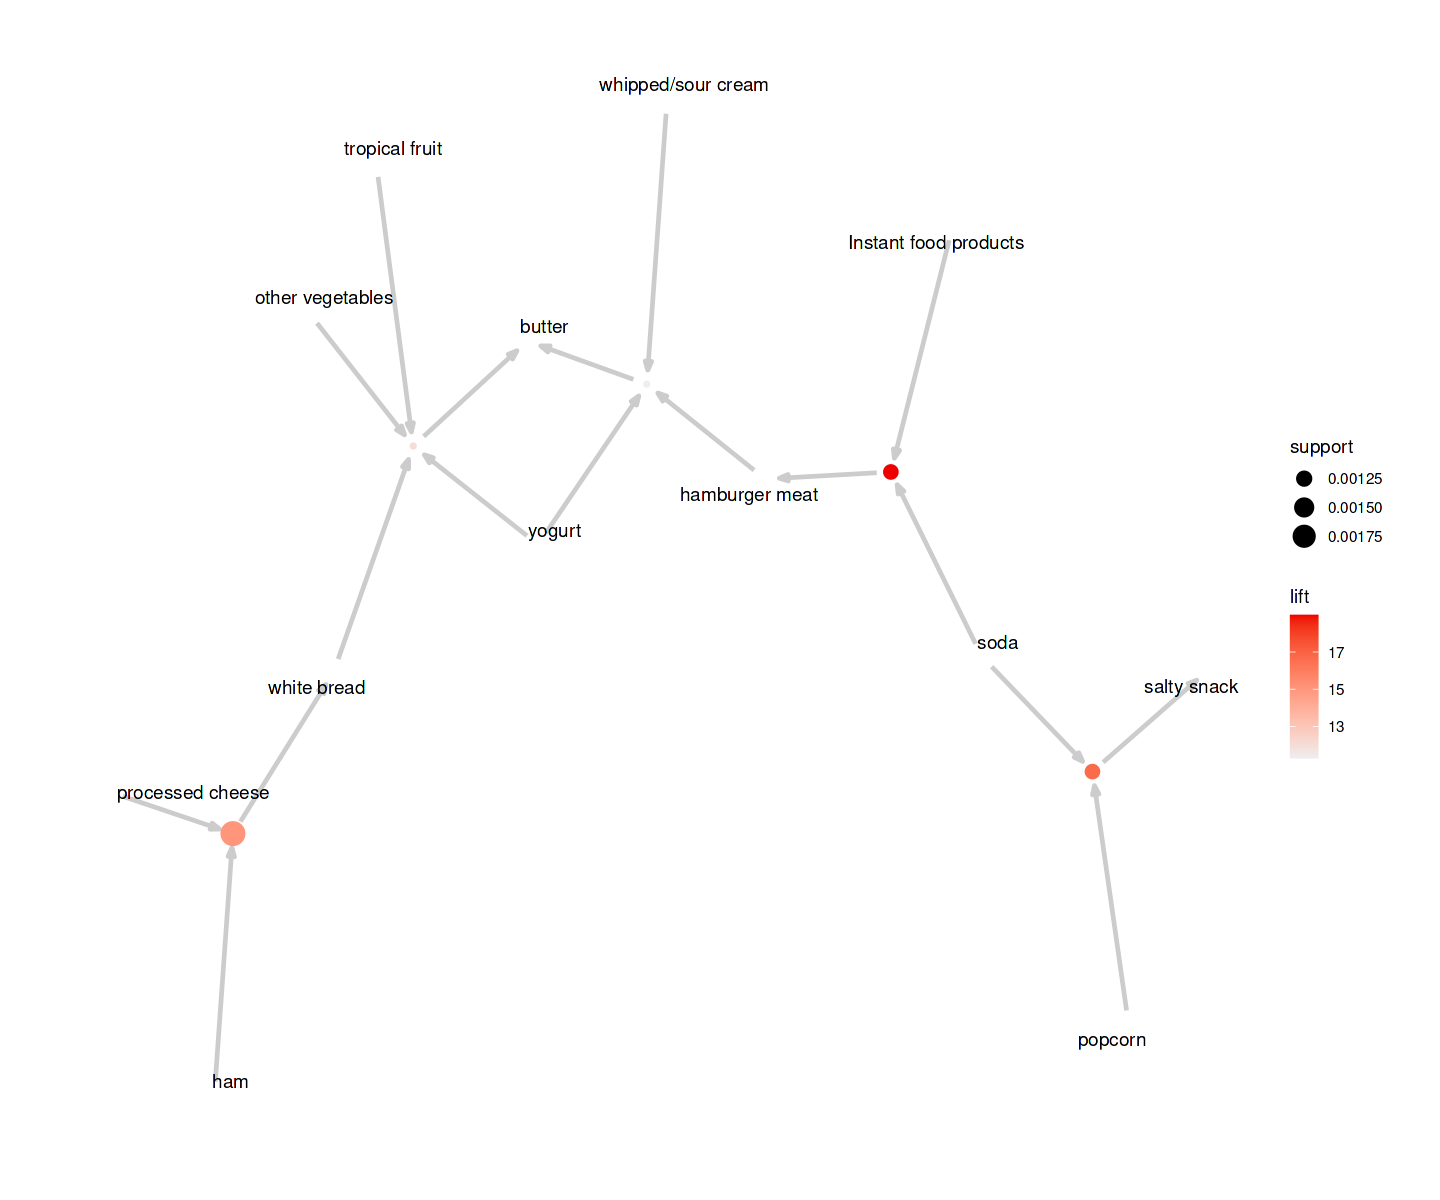

In [20]:
options(repr.plot.width = 12, repr.plot.height = 10)
ig <- plot(highLiftRules, method = "graph")
ig$layers[[1]]$aes_params$edge_alpha = 1
ig$layers[[1]]$aes_params$edge_width = 1
plot(ig)

## ✅ Conclusion

This notebook demonstrates how to perform association rule mining on a real-world transaction dataset. You explored frequent itemsets and generated meaningful rules to reveal hidden purchase patterns in grocery shopping behavior.